# Scikit Learn

# Régression sur le prix des maisons à boston

## 1) Import de dataset

In [1]:
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

boston = datasets.load_boston()
X = boston["data"]
y = boston["target"]



## 2) separer le jeu d'apprentissage du jeu de test

In [6]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.cross_validation import train_test_split

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## 3) Standardiser les valeurs

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)                 # Il ne faut fiter que sur les data d'entrainement
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)  # apply same transformation to test data

## 4) choisir un algo et le tester
exemple : Support Vector Machine

In [16]:
from sklearn import svm
svr = svm.SVR(kernel='linear')

from sklearn import cross_validation
cross_validation.cross_val_score(svr, X, y, n_jobs=-1)

array([ 0.7002155 ,  0.31447767, -0.44395345])

## 5) aller au delà des paramètres par défaut avec un grid search

In [13]:
from sklearn import cross_validation
from sklearn import grid_search
parameters = {  'gamma' : [0.01, 0.1, 0.5]           }
grid       = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

## 5.1) affiner le grid search

In [34]:
parameters = {  'C'      : [0.5, 1, 1.5]             ,
                'gamma'  : [0.5, 0.1, 0.15]      }
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_

0.564272956791 SVR(C=1.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [35]:
parameters = {  'C'      : [1.5, 2, 2.5]   ,
                'kernel' : ['rbf', 'poly', 'sigmoid'],
                'gamma'  : [ 0.05, 0.10, 0.15] }
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_


0.672021351295 SVR(C=2.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [36]:
parameters = {  'C'       : [2.5, 3, 4]   ,
                'kernel'  : ['rbf', 'poly', 'sigmoid'],
                'gamma'   : [ 0.01, 0.05, 0.07],
                 "degree" : [1,3,5]}
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_


0.706920845534 SVR(C=4, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma=0.05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [37]:
parameters = {  'C'       : [4, 5, 6, 7]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03, 0.05, 0.07],
                 "degree" : [1,2, 3]}
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_


0.744120549013 SVR(C=7, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma=0.03,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [38]:
parameters = {  'C'       : [7, 10, 15]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.02, 0.03, 0.04],
                 "degree" : [1,2]}
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_


0.770056777954 SVR(C=15, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma=0.04,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [39]:
parameters = {  'C'       : [10, 15, 20, 30]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03],
                  "epsilon" : [0.01, 0.05, 0.15],
                 "degree" : [1,2]}
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_


0.779777006678 SVR(C=30, cache_size=200, coef0=0.0, degree=1, epsilon=0.15, gamma=0.03,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [40]:
parameters = {  'C'       : [30, 50, 100]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03],
                  "epsilon" : [0.01, 0.05, 0.15, 0.5, 0.9, 1],
                 "degree" : [1,2]}
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_


0.803300187581 SVR(C=100, cache_size=200, coef0=0.0, degree=1, epsilon=1, gamma=0.03,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [41]:
parameters = {  'C'       : [190, 200, 250, 260]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03],
                  "epsilon" : [1.5, 2, 2.5],
                 "degree" : [1,2]}
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_


0.812370067012 SVR(C=260, cache_size=200, coef0=0.0, degree=1, epsilon=2.5, gamma=0.03,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


# On aurait pu faire une fonction de test : 

In [38]:
def test_hyperparametres(hyperparametres):
    grid       = grid_search.GridSearchCV(svm.SVR(), hyperparametres, n_jobs=-1)
    grid.fit(X_train, y_train)
    print (grid.best_score_, grid.best_estimator_)    
    return grid.best_score_, grid.best_estimator_
    

In [39]:
hyperparametres = {  'gamma' : [0.01, 0.1, 0.5, 0.015]          ,
                  "kernel" : ['linear', 'poly', 'rbf', 'sigmoid',  ],
                  "C" : [105, 200]}
test_hyperparametres(hyperparametres)

0.8393228851541024 SVR(C=200, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.015,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


(0.8393228851541024,
 SVR(C=200, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.015,
   kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))

In [43]:
from sklearn.linear_model import Lasso

In [80]:
def test_hyperparametres(algo, hyperparametres):
    grid       = grid_search.GridSearchCV(algo, hyperparametres, n_jobs=-1)
    grid.fit(X_train, y_train)
    print (grid.best_score_, grid.best_estimator_)    
    return grid.best_score_, grid.best_estimator_


In [88]:
algo = Lasso()
params = {"max_iter" : [ 1000],
         "alpha" : [0.1], 
         "selection": ["random", "cyclic"]}
grid       = grid_search.GridSearchCV(algo, params, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)    


0.7102394048117638 Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


# Import de xgboost

In [42]:
!pip install xgboost


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -y


In [89]:
from xgboost import XGBRegressor

algo = XGBRegressor()

In [102]:
type(default_value)

str

In [106]:
default_value

In [114]:
default_hyperparameters = algo.get_params()
espace_de_Recherche = {}
for i, hyperparam in enumerate(default_hyperparameters):
    default_value = default_hyperparameters[hyperparam]
    if default_value:
        if type(default_value) == int:
            delta = default_value * 2
            valeurs_de_recherches = [default_value-delta,default_value, default_value+ delta]
        if type(default_value) == float:
            delta = default_value * 0.1
            valeurs_de_recherches = [default_value-delta,default_value, default_value+ delta]
        if type(default_value) == bool:
            valeurs_de_recherches = [True, False]
        espace_de_Recherche[hyperparam]=valeurs_de_recherches
        print(hyperparam, default_value, valeurs_de_recherches)
espace_de_Recherche["n_jobs"]=[-1]

base_score 0.5 [0.45, 0.5, 0.55]
booster gbtree [0.45, 0.5, 0.55]
colsample_bylevel 1 [-1, 1, 3]
colsample_bytree 1 [-1, 1, 3]
learning_rate 0.1 [0.09, 0.1, 0.11000000000000001]
max_depth 3 [-3, 3, 9]
min_child_weight 1 [-1, 1, 3]
n_estimators 100 [-100, 100, 300]
n_jobs 1 [-1, 1, 3]
objective reg:linear [-1, 1, 3]
reg_lambda 1 [-1, 1, 3]
scale_pos_weight 1 [-1, 1, 3]
silent True [True, False]
subsample 1 [-1, 1, 3]


In [115]:
def test_hyperparametres(algo, hyperparametres):
    grid       = grid_search.GridSearchCV(algo, hyperparametres, n_jobs=-1)
    grid.fit(X_train, y_train)
    print (grid.best_score_, grid.best_estimator_)    
    return grid.best_score_, grid.best_estimator_


In [156]:
espace_de_Recherche = {
    "max_depth" : [1,5,10],
    "gamma" : [0.5, 1, 1.1, 1.2, 1.5]
}
test_hyperparametres(XGBRegressor(), espace_de_Recherche)

0.8674334701155907 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=1.2, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


(0.8674334701155907,
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bytree=1, gamma=1.2, learning_rate=0.1, max_delta_step=0,
        max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
        n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
        silent=True, subsample=1))

In [123]:
modele = algo.fit(X_train, y_train)

modele.score(X_test, y_test)

0.8395298044638779

# 6) tester tous les algorithmes

In [129]:
def get_sklearn_algorithms(verbose = False):
    """
    Explore all submodule of sklearn and fetch functions having a 'fit' attribute.
    
    Be careful : some functions are not models (ex : crossvalidators)
    Parameters :
        debug = print or not stuff on console
    Return :
        dict : { module : [ fit_functions] }
    """
    from collections import defaultdict
    import importlib
    import sklearn
    algos = defaultdict(list)
    if verbose : print (dir(sklearn))
    for nom_module in dir(sklearn):    
        if verbose : print (nom_module)
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if hasattr(fonction, "fit"):
                    if verbose : print (" nom algorithme  = ", nom_fonction)
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print( e)
        if verbose: print ("="*30)
    return algos

In [131]:
algos = get_sklearn_algorithms()
algos

defaultdict(list,
            {'feature_extraction': [sklearn.feature_extraction.dict_vectorizer.DictVectorizer,
              sklearn.feature_extraction.hashing.FeatureHasher],
             'feature_selection': [sklearn.feature_selection.univariate_selection.GenericUnivariateSelect,
              sklearn.feature_selection.rfe.RFE,
              sklearn.feature_selection.rfe.RFECV,
              sklearn.feature_selection.univariate_selection.SelectFdr,
              sklearn.feature_selection.univariate_selection.SelectFpr,
              sklearn.feature_selection.from_model.SelectFromModel,
              sklearn.feature_selection.univariate_selection.SelectFwe,
              sklearn.feature_selection.univariate_selection.SelectKBest,
              sklearn.feature_selection.univariate_selection.SelectPercentile,
              sklearn.feature_selection.variance_threshold.VarianceThreshold],
             'gaussian_process': [sklearn.gaussian_process.gaussian_process.GaussianProcess,
      

## Liste les algorithmes

In [133]:
algos = get_sklearn_algorithms()
for key in algos.keys():
    print ("\n===>",key)
    algos_ = []
    for algo in algos[key]:
        classe_algo = str(algo)
        nom_algo    = classe_algo[str(classe_algo).rfind(".")+1:str(classe_algo).rfind("'")]
        algos_.append(nom_algo)
    print (",".join(algos_))


===> feature_extraction
DictVectorizer,FeatureHasher

===> feature_selection
GenericUnivariateSelect,RFE,RFECV,SelectFdr,SelectFpr,SelectFromModel,SelectFwe,SelectKBest,SelectPercentile,VarianceThreshold

===> gaussian_process
GaussianProcess,GaussianProcessClassifier,GaussianProcessRegressor

===> grid_search
GridSearchCV,RandomizedSearchCV

===> linear_model
ARDRegression,BayesianRidge,ElasticNet,ElasticNetCV,HuberRegressor,Lars,LarsCV,Lasso,LassoCV,LassoLars,LassoLarsCV,LassoLarsIC,LinearRegression,LogisticRegression,LogisticRegressionCV,MultiTaskElasticNet,MultiTaskElasticNetCV,MultiTaskLasso,MultiTaskLassoCV,OrthogonalMatchingPursuit,OrthogonalMatchingPursuitCV,PassiveAggressiveClassifier,PassiveAggressiveRegressor,Perceptron,RANSACRegressor,RandomizedLasso,RandomizedLogisticRegression,Ridge,RidgeCV,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SGDRegressor,TheilSenRegressor

===> model_selection
GridSearchCV,RandomizedSearchCV

===> multiclass
LabelBinarizer,OneVsOneClassifier

## supprimer les warnings dans jupyter

In [134]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Utiliser chaque algo et conserver les performances

In [135]:
performances               = {}
modeles_a_tester           = []
classes_de_models_a_tester = algos.keys()
best_algorithm = 0
best_perf = 0
for classe_de_models in classes_de_models_a_tester:
    modeles_a_tester.extend(algos[classe_de_models])
    
for pointeur_vers_algo in modeles_a_tester:
    try:
        algorithme = pointeur_vers_algo()
        doc        = algorithme.__doc__
        name       = doc[:min(doc.find(":"), 25)].strip()
        print (name)
        algorithme.fit(X_train, y_train)
        performance = algorithme.score(X_test, y_test)
        print (performance)
        if performance >  best_perf:
            best_algorithm = algorithme
            best_perf = performance
            
        if 0<performance and performance<1:
            performances[name] = [performance]
    except Exception as e:
        if "label" in str(e): print ("Algo de classification")
        else                : print (str(e)[:50])
    print ("="*30)
    

Transforms lists of featu
'numpy.ndarray' object has no attribute 'items'
Implements feature hashin
'FeatureHasher' object has no attribute 'score'
Univariate feature select
'GenericUnivariateSelect' object has no attribute 
__init__() missing 1 required positional argument:
__init__() missing 1 required positional argument:
Filter
'SelectFdr' object has no attribute 'score'
Filter
'SelectFpr' object has no attribute 'score'
__init__() missing 1 required positional argument:
Filter
'SelectFwe' object has no attribute 'score'
Select features according
'SelectKBest' object has no attribute 'score'
Select features according
'SelectPercentile' object has no attribute 'score'
Feature selector that rem
'VarianceThreshold' object has no attribute 'score
The legacy Gaussian Proce
0.4818421564241594
Gaussian process classifi
Algo de classification
Gaussian process regressi
0.25150130551331884
__init__() missing 2 required positional arguments
__init__() missing 2 required positional arguments
B

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), Futu

'RandomizedLasso' object has no attribute 'score'
Randomized Logistic Regre
Algo de classification
Linear least squares with
0.7547479499392641
Ridge regression with bui
0.753026064033575
Classifier using Ridge re
Algo de classification
Ridge classifier with bui
Algo de classification
Linear classifiers (SVM,
Algo de classification
Linear model fitted by mi
0.7373250556234119
Theil-Sen Estimator


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.5801127497177181
__init__() missing 2 required positional arguments
__init__() missing 2 required positional arguments
Binarize labels in a one-
fit() takes 2 positional arguments but 3 were give
__init__() missing 1 required positional argument:
__init__() missing 1 required positional argument:
__init__() missing 1 required positional argument:
'NoneType' object has no attribute 'find'
Classifier implementing t
Algo de classification
Regression based on k-nea
0.6865615046809649
Kernel Density Estimation
-2644.846806065456
Performs approximate near
'LSHForest' object has no attribute 'score'
Unsupervised Outlier Dete
'LocalOutlierFactor' object has no attribute 'scor
Nearest centroid classifi
Algo de classification
Unsupervised learner for
'NearestNeighbors' object has no attribute 'score'
Classifier implementing a
Algo de classification
Regression based on neigh
Input contains NaN, infinity or a value too large 
Binarize data (set featur
'Binarizer' object has no attribute 'score'


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/random_projection.py:378: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (13 < 32).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  re

## meilleur algo

In [137]:
best_algorithm, best_perf

(ARDRegression(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
        fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
        normalize=False, threshold_lambda=10000.0, tol=0.001, verbose=False),
 0.7566956549272261)

## Performances de chaque algo :

In [138]:
performances

{'The legacy Gaussian Proce': [0.4818421564241594],
 'Gaussian process regressi': [0.25150130551331884],
 'Bayesian ARD regression.': [0.7566956549272261],
 'Bayesian ridge regression': [0.7539036234085391],
 'Linear regression with co': [0.6609667564060987],
 'Elastic Net model with it': [0.7544995272606819],
 'Linear regression model t': [0.7438393206704702],
 'Least Angle Regression mo': [0.7548182717417403],
 'Cross-validated Least Ang': [0.7549941450039831],
 'Linear Model trained with': [0.6880555246483908],
 'Lasso linear model with i': [0.754971180453359],
 'Cross-validated Lasso, us': [0.7549425278973078],
 'Lasso model fit with Lars': [0.7551105094008397],
 'Ordinary least squar': [0.7548182717417403],
 'Orthogonal Matching Pursu': [0.5636278772678116],
 'Cross-validated Orthogona': [0.7145724160031293],
 'Passive Aggressive Regres': [0.6055960898493726],
 'RANSAC (RANdom SAmple Con': [0.6316921774433296],
 'Linear least squares with': [0.7547479499392641],
 'Ridge regression

## on manipule les performances via panda

In [140]:
import pandas as pd

In [141]:
df = pd.DataFrame(performances).T

In [142]:
col_name = "performance"
df.columns = [col_name]

In [143]:
sort_values(col_name)

In [144]:
df

,performance
Gaussian process regressi,0.251501
The legacy Gaussian Proce,0.481842
Orthogonal Matching Pursu,0.563628
Theil-Sen Estimator,0.580113
Passive Aggressive Regres,0.605596
Nu Support Vector Regress,0.630618
RANSAC (RANdom SAmple Con,0.631692
Epsilon-Support Vector Re,0.653168
Linear regression with co,0.660967
Regression based on k-nea,0.686562


## calcul des gains de performance d'un algo l'autre

In [147]:
liste_des_performances = df.performance.values
gains = [0]
for indice, performance in enumerate(liste_des_performances):
    if indice>0:
        previous_value = liste_des_performances[indice-1]
        current_value  = liste_des_performances[indice]
        gain = (current_value - previous_value) / previous_value
        gains.append(round(gain*100, 2))
df["gains"] = gains

In [149]:
#

In [150]:
df

,performance,gains
Gaussian process regressi,0.251501,0.00
The legacy Gaussian Proce,0.481842,91.59
Orthogonal Matching Pursu,0.563628,16.97
Theil-Sen Estimator,0.580113,2.92
Passive Aggressive Regres,0.605596,4.39
Nu Support Vector Regress,0.630618,4.13
RANSAC (RANdom SAmple Con,0.631692,0.17
Epsilon-Support Vector Re,0.653168,3.40
Linear regression with co,0.660967,1.19
Regression based on k-nea,0.686562,3.87


## Tracer les performances par algo

In [151]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [153]:
df = df.drop("gains", axis=1)

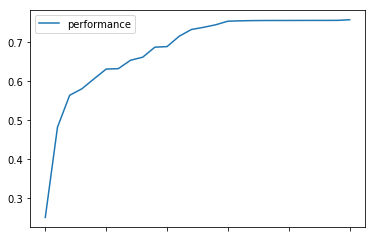

In [154]:
df = df.sort_values(col_name)
ax = df.plot(rot=45, x_compat=True)

### Augmentation du nombre de légend

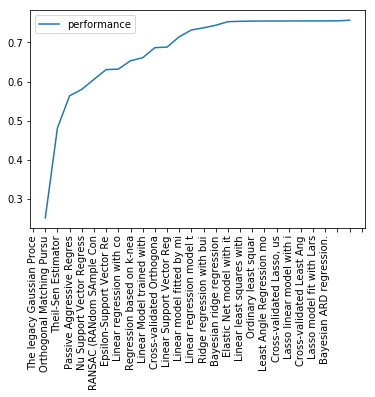

In [155]:
df = df.sort_values(col_name)
ax = df.plot(rot=90, x_compat=True)
ax.xaxis.set_ticklabels(df.index)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

### Rotation des infos sur x, et image plus large

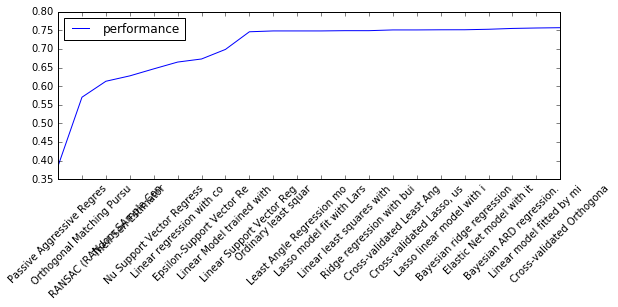

In [62]:
fig , axes = plt.subplots(1,1)
fig.set_size_inches(9,3)
df = df.sort_values(col_name )
axes.xaxis.set_ticklabels(df.index)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
df.plot(rot=45, ax=axes)


### affichage en barre

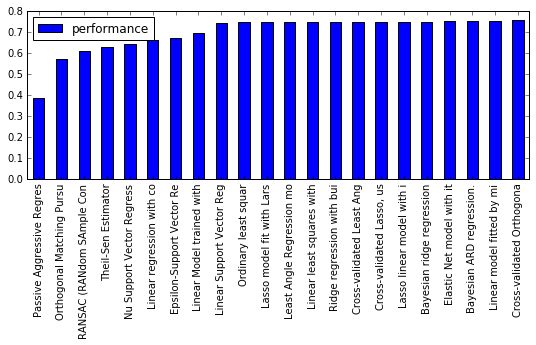

In [63]:
fig , axes = plt.subplots(1,1)
fig.set_size_inches(9,3)
df = df.sort_values(col_name )
axes.xaxis.set_ticklabels(df.index)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
df.plot(kind='bar', rot=90, ax=axes)

## on rajoute la perforamnce dans les labels

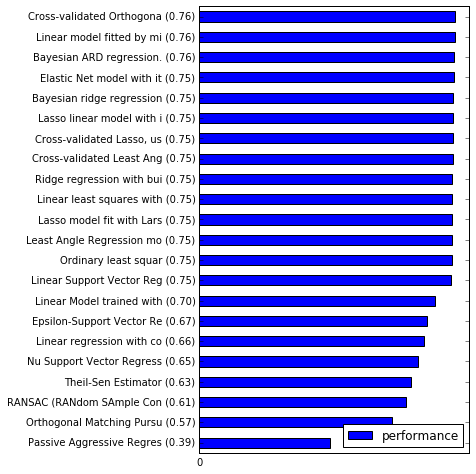

In [64]:
new_labels = []
for i, index in enumerate(df.index):
    new_label = "%s (%.2f)"%(index,df.performance[i])
    new_labels.append(new_label.replace("\n", " "))
    
fig , axes = plt.subplots(1,1)
df.index = new_labels
fig.set_size_inches(15,8)
fig.subplots_adjust(left=0.65)
df.sort_values(col_name).plot(kind='barh', ax=axes)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))

pass

# 7) which scoring function ?

## on récupère les fonctions de score

In [65]:
def get_sklearn_score_functions(verbose = False):
    """
    Explore all submodule of sklearn and fetch functions named as 'score'.
    
    Parameters :
        debug = print or not stuff on console
    Return :
        dict : { module : [ score_functions] }
    """
    from collections import defaultdict
    import importlib
    import sklearn
    algos = defaultdict(list)
    if verbose : print dir(sklearn)
    for nom_module in dir(sklearn):    
        if verbose : print nom_module
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if "score" in nom_fonction:
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print e
        if verbose: print "="*30
    return algos

In [66]:
scoring_modules = get_sklearn_score_functions(False)

In [67]:
scoring_modules.keys()

['grid_search', 'metrics', 'cross_validation']

## on s'intéresse aux métriques

In [68]:
scoring_modules["metrics"]

[<function sklearn.metrics.classification.accuracy_score>,
 <function sklearn.metrics.cluster.supervised.adjusted_mutual_info_score>,
 <function sklearn.metrics.cluster.supervised.adjusted_rand_score>,
 <function sklearn.metrics.ranking.average_precision_score>,
 <function sklearn.metrics.classification.brier_score_loss>,
 <function sklearn.metrics.classification.cohen_kappa_score>,
 <function sklearn.metrics.cluster.supervised.completeness_score>,
 <function sklearn.metrics.cluster.bicluster.consensus_score>,
 <function sklearn.metrics.regression.explained_variance_score>,
 <function sklearn.metrics.classification.f1_score>,
 <function sklearn.metrics.classification.fbeta_score>,
 <function sklearn.metrics.scorer.get_scorer>,
 <function sklearn.metrics.cluster.supervised.homogeneity_score>,
 <function sklearn.metrics.classification.jaccard_similarity_score>,
 <function sklearn.metrics.ranking.label_ranking_average_precision_score>,
 <function sklearn.metrics.scorer.make_scorer>,
 <fun

# 8) tester les métriques sur un algo

In [69]:
from sklearn.ensemble import BaggingRegressor

# 8.1) l'algo a des performances variables

In [70]:
performances = {}
for i in range(10):
    algorithme = BaggingRegressor()
    algorithme.fit(X_train, y_train)
    performance = algorithme.score(X_test, y_test)
    print i, performance
    performances[i] = [performance]

0 0.875152694243
1 0.886705676437
2 0.889211326493
3 0.869657209423
4 0.839075125445
5 0.885239421773
6 0.881646659982
7 0.877158219726
8 0.8689677812
9 0.883690176553


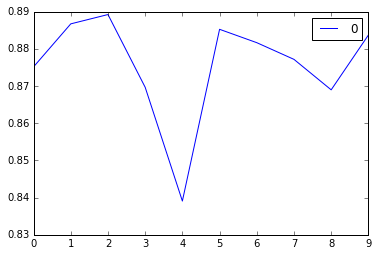

In [71]:
pd.DataFrame.from_dict(performances).T.plot()

## On peut calculer diverses métriques

In [72]:
y_pred = algorithme.predict(X_test)

In [75]:
score_par_metric = {}
for scoring_function in scoring_modules["metrics"]:
    try:
        info         = str(scoring_function)
        nom_metrique = info[info.find(" "):info.find(" at ")].strip()
        score_algo   = scoring_function(y_test, y_pred)
        score_par_metric[nom_metrique] =  [score_algo]
        print nom_metrique, " => ", score_algo
    except:
        pass

adjusted_mutual_info_score  =>  -0.00102189425976
adjusted_rand_score  =>  -0.000413061171917
completeness_score  =>  0.916946313301
explained_variance_score  =>  0.88384552252
homogeneity_score  =>  0.994695735047
mutual_info_score  =>  4.67009039306
normalized_mutual_info_score  =>  0.955030149842
r2_score  =>  0.883690176553
v_measure_score  =>  0.954239929903


## on les manipule dans une dataframe pandas

In [78]:
df_metriques = pd.DataFrame.from_dict(score_par_metric).T

In [79]:
colonne_de_score = "score"
df_metriques.columns = [colonne_de_score]
df_metriques.sort_values(colonne_de_score)

,score
adjusted_mutual_info_score,-0.001022
adjusted_rand_score,-0.000413
r2_score,0.883690
explained_variance_score,0.883846
completeness_score,0.916946
v_measure_score,0.954240
normalized_mutual_info_score,0.955030
homogeneity_score,0.994696
mutual_info_score,4.670090


## on peut les dessiner

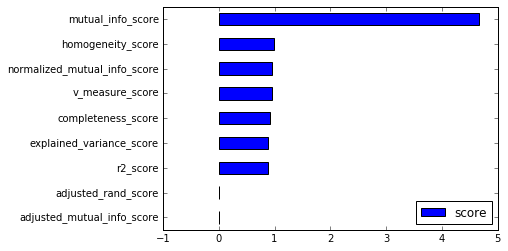

In [80]:
df_metriques.sort_values(by=colonne_de_score).plot(kind="barh")

# on s'intéresse en général au r2 et à la variance expliquée